<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/trade_balance/tradebalance_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 貿易収支データの分析

## データの出典情報

1. https://www.kaggle.com/zanjibar/japan-trade-statistics
2. https://www.kaggle.com/zanjibar/japantradestatistics2

1.2.共にライセンスは https://creativecommons.org/licenses/by-sa/4.0/

## データの簡単な紹介

- FILLME
- FILLME
- FILLME

## 課題1

https://www.kaggle.com/zanjibar/japan-trade-statistics
https://www.kaggle.com/zanjibar/japantradestatistics2

にどのような情報があるかざっとながめてみましょう。

## Japan trade statistics のデータの取得と解凍

Kaggleにある[データ可視化の例](https://www.kaggle.com/zanjibar/year-1997-top-20-export-import-graph)を試すため、

https://github.com/hannari-python/tutorial/tree/master/data/japan-trade-statistics

からデータをダウンロードします。

! は FILLME と呼ばれます。
!の後にLinuxコマンドを書くとそのセルの命令はPythonプログラムではなくLinuxのコマンドとして実行されます。

wget はデータをダウンロードするのに使うことができるLinuxのコマンドです。


In [1]:
!wget https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/y_1997.db
!wget https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/trade_meta_data.db
!wget https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/codes.db

--2020-08-14 16:28:33--  https://github.com/hannari-python/tutorial/raw/master/data/japan-trade-statistics/y_1997.db
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/hannari-python/tutorial/master/data/japan-trade-statistics/y_1997.db [following]
--2020-08-14 16:28:33--  https://media.githubusercontent.com/media/hannari-python/tutorial/master/data/japan-trade-statistics/y_1997.db
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482275328 (460M) [application/octet-stream]
Saving to: ‘y_1997.db’

y_1997.db           100%[===================>] 459.93M   150MB/s    in 3.1s    

2020-08-14 1

## データロード

In [2]:
import sqlite3
import pandas as pd

#  1997 - data
conn = sqlite3.connect('./y_1997.db')
cursor = conn.cursor()
# hs code,country,hs,code
attach = 'attach "./trade_meta_data.db" as code'
cursor.execute(attach)
# import hs,country code as pandas
tmpl = "{hs}_{lang}_df =  pd.read_sql('select * from code.{hs}_{lang}',conn)"
for hs in ['hs2','hs4','hs6','hs6','hs9']:
    for lang in ['jpn','eng']:
        exec(tmpl.format(hs=hs,lang=lang))        
# country 
country_eng_df = pd.read_sql('select * from code.country_eng',conn)
country_eng_df['Country']=country_eng_df['Country'].apply(str)
country_jpn_df = pd.read_sql('select * from code.country_jpn',conn)
country_jpn_df['Country']=country_jpn_df['Country'].apply(str)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


export import from 1997
CPU times: user 4.1 s, sys: 357 ms, total: 4.46 s
Wall time: 4.49 s


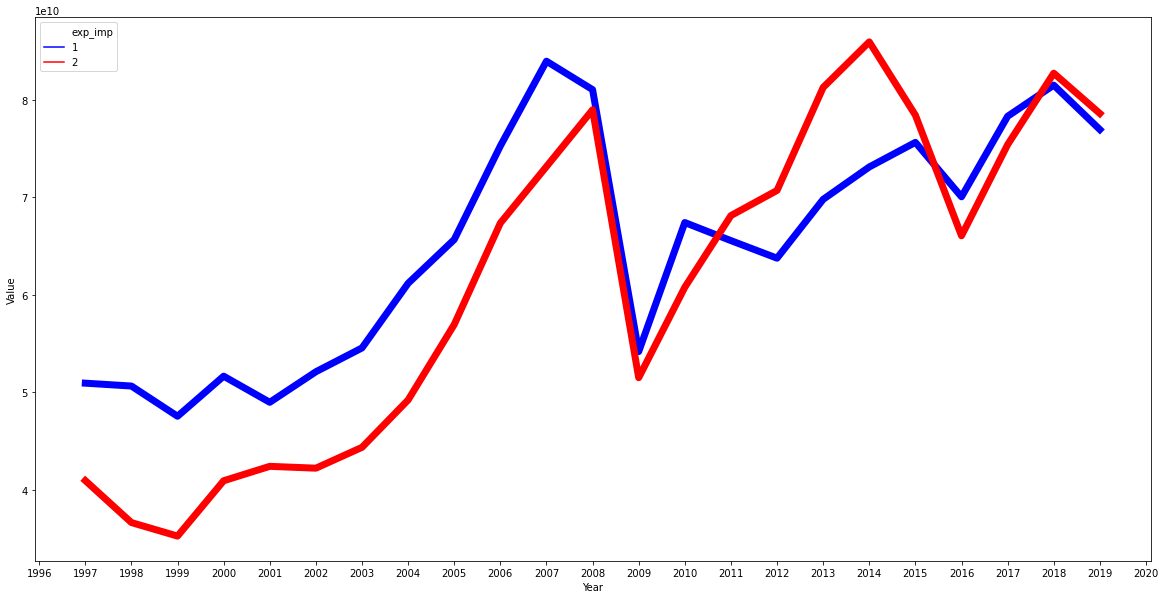

In [3]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# show_tables 	year_from_1997
# pd.read_sql(show_tables,conn_1997)
sql="""
select  exp_imp,Year,sum(Value) as Value from year_from_1997
group by Year,exp_imp
"""[1:-1]
xdf = pd.read_sql(sql,conn)

plt.figure(figsize=(20, 10))
ax  = sns.lineplot(x='Year',y='Value',hue='exp_imp',linewidth = 7.0,
             palette={1: "b", 2: "r"},
             data=xdf)
ax.legend_._loc = 2
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
print('export import from 1997')

`country_graph`はFILLMEを入力とし、FILLMEを出力します。

In [4]:
def country_graph(Country,title):
    sql="""
    select  exp_imp,Year,sum(Value) as Value from year_from_1997
    where Country='{Country}'
    group by Year,exp_imp
    """[1:-1]
    xdf = pd.read_sql(sql.format(Country=Country),conn)
    plt.figure(figsize=(20, 10))

    ax  = sns.lineplot(x='Year',y='Value',hue='exp_imp',linewidth = 7.0,
             palette={1: "b", 2: "r"},
             data=xdf)
    ax.legend_._loc = 2
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
    print(title)

China


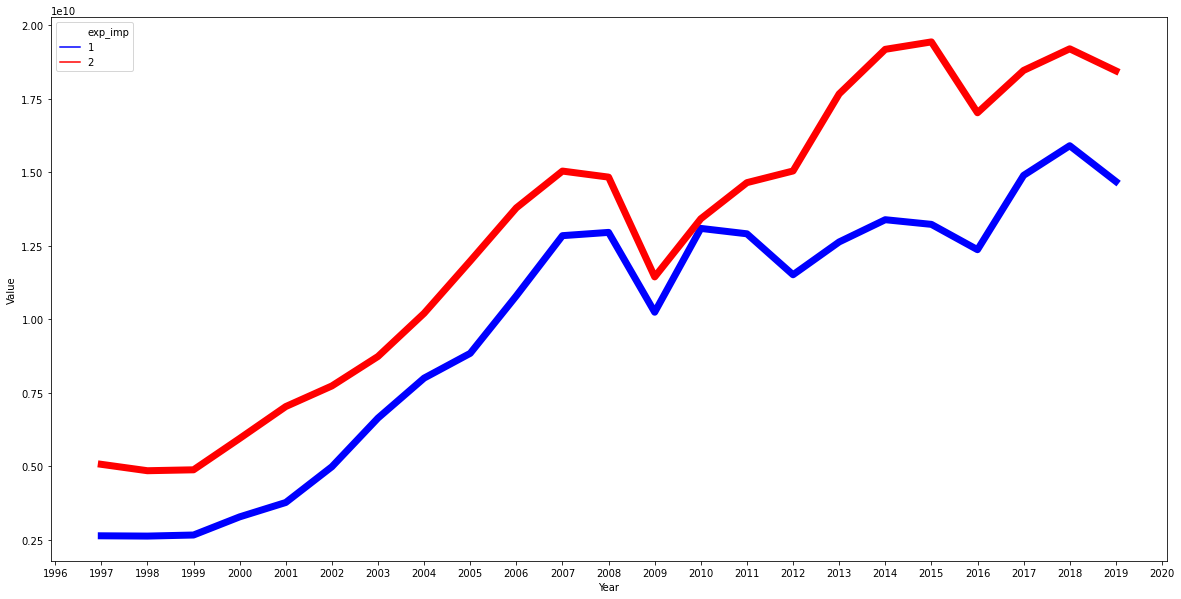

In [5]:
# China (105)
Country = '105'
title = 'China'
country_graph(Country,title)

In [ ]:
xdf

,exp_imp,Year,Value
0,1,1997,50937991859
1,2,1997,40956182573
2,1,1998,50645003938
3,2,1998,36653647183
4,1,1999,47547556241
5,2,1999,35268008063
6,1,2000,51654197760
7,2,2000,40938422968
8,1,2001,48979244311
9,2,2001,42415533002


- `exp_imf`はFILLMEを
- `Value`はFILLMEを

表します

In [6]:
country_eng_df

,Country,Country_name,Area
0,103,Korea,Asia
1,104,North_Korea,Asia
2,105,China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia
...,...,...,...
227,627,Northern_Mariana_Islands_(USA),Oceania
228,628,Palau,Oceania
229,701,For_Order,Special_Area
230,702,Unknown,Special_Area


`Country`列はFILLMEを表します。

In [7]:
country_jpn_df

,Country,Country_name,Area
0,103,大韓民国,Asia
1,104,北朝鮮,Asia
2,105,中華人民共和国,Asia
3,106,台湾,Asia
4,107,モンゴル,Asia
...,...,...,...
227,627,北マリアナ諸島(米),Oceania
228,628,パラオ,Oceania
229,701,指図式,Special_Area
230,702,不明,Special_Area


## データの変換

機械学習を適用しやすいようにデータを変換します。まず、国名の配列を取得します。

In [8]:
countries = country_eng_df["Country_name"].values
country_ids = country_eng_df["Country"].values

最後の三つは国以外の情報のようなので、国名から削除します。

In [9]:
countries[-3:]

array(['For_Order', 'Unknown', 'Bonded_Manufacturing_Warehouse'],
      dtype=object)

In [10]:
countries = countries[:-3]
country_ids = country_ids[:-3]
countries[-3:]

array(['Micronesia', 'Northern_Mariana_Islands_(USA)', 'Palau'],
      dtype=object)

SQLでデータを取得し、numpy配列に保存します。

In [11]:
sql="""
  select  exp_imp,Year,sum(Value) as Value from year_from_1997
  where Country='{Country}'
  group by Year,exp_imp
  """[1:-1]

ys1_all = [] # "1" の年
ys2_all = [] # "2" の年
vs1_all = [] # "1" の数値
vs2_all = [] # "2" の数値

for c in country_ids:
  xdf = pd.read_sql(sql.format(Country=c),conn)
  print(c)
  ys1 = xdf[xdf["exp_imp"] == 1]["Year"].values
  vs1 = xdf[xdf["exp_imp"] == 1]["Value"].values
  ys2 = xdf[xdf["exp_imp"] == 2]["Year"].values
  vs2 = xdf[xdf["exp_imp"] == 2]["Value"].values
  ys1_all.append(ys1)
  ys2_all.append(ys2)
  vs1_all.append(vs1)
  vs2_all.append(vs2)

103
104
105
106
107
108
110
111
112
113
116
117
118
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
137
138
140
141
143
144
145
146
147
149
150
151
152
153
154
155
156
157
158
201
202
203
204
205
206
207
208
209
210
211
212
213
215
216
217
218
219
220
221
222
223
224
225
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
301
302
303
304
305
306
307
308
309
310
311
312
314
315
316
317
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
601
602
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
624
625
626
627
628


データ長の種類を確認します。

In [12]:
import numpy as np
for n in np.unique([len(c) for c in ys1_all]):
  print("len(years) = {}: n = {}".format(n, len([1 for y in ys1_all if len(y) == n])))
  print("len(years) = {}: n = {}".format(n, len([1 for y in ys2_all if len(y) == n])))

len(years) = 6: n = 1
len(years) = 6: n = 0
len(years) = 8: n = 1
len(years) = 8: n = 1
len(years) = 9: n = 2
len(years) = 9: n = 1
len(years) = 10: n = 1
len(years) = 10: n = 1
len(years) = 11: n = 2
len(years) = 11: n = 1
len(years) = 13: n = 2
len(years) = 13: n = 1
len(years) = 14: n = 1
len(years) = 14: n = 2
len(years) = 19: n = 2
len(years) = 19: n = 3
len(years) = 20: n = 1
len(years) = 20: n = 2
len(years) = 21: n = 1
len(years) = 21: n = 10
len(years) = 22: n = 1
len(years) = 22: n = 8
len(years) = 23: n = 214
len(years) = 23: n = 188


多くの国（188）で、"1"と"2"の両方で23年分のデータがあります。MLを適用するためには固定長のデータが都合が良いので、データをスクリーニングします。最初に年度の配列を作成します。

In [13]:
ys = np.array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

国を年度でスクリーニングします。

In [14]:
ys1_all2 = []
ys2_all2 = []
vs1_all2 = []
vs2_all2 = []

for ys1_, ys2_, vs1_, vs2_ in zip(ys1_all, ys2_all, vs1_all, vs2_all):
  cond1 = set(ys1_) == set(ys)
  cond2 = set(ys2_) == set(ys)
  if cond1 and cond2:
    assert (ys1_ - ys).sum() == 0 and (ys2_ - ys).sum() == 0
    vs1_all2.append(vs1_)
    vs2_all2.append(vs2_)

データを行列に変換します。これで187

In [15]:
vs1_all3 = np.vstack(vs1_all2)
vs2_all3 = np.vstack(vs2_all2)
assert vs1_all3.shape == vs2_all3.shape == (187, 23)

クラスタリングを実行します。

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
labels = model.fit_predict(vs1_all3)

ほとんどの国が同じクラス（ラベル0）に分類されました。

In [17]:
labels

array([2, 1, 2, 0, 2, 4, 2, 4, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3,
       4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

クラス平均ベクトルをプロットします。

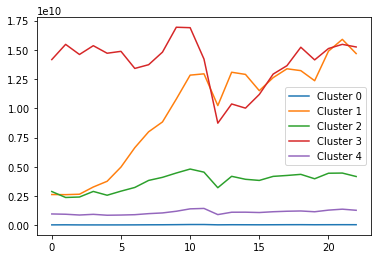

In [18]:
import matplotlib.pyplot as plt
for i in np.arange(5):
  plt.plot(model.cluster_centers_[i, :], label="Cluster {}".format(i))
plt.legend()

貿易量の多さで分類されているようです。これでも意味はありますが、時間的な傾向の違いで分類したい場合、何らかの方法でデータを正規化するのが良いでしょう。

参考：https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

## Kaggle APIのための設定

最初のセルでKaggle APIトークンをgoogle colabのサーバにアップロードします。

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"takuyoshioka","key":"b9bcf561725a96bd55f565c1ce19537d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d zanjibar/japan-trade-statistics

 99% 691M/697M [00:24<00:00, 29.8MB/s]
100% 697M/697M [00:24<00:00, 29.7MB/s]


## Japan trade statisticsデータのダウンロード

Kaggleのサイトにある[データ可視化の例](https://www.kaggle.com/zanjibar/year-1997-top-20-export-import-graph)を試すため、Kaggleのサイトからデータをダウンロードします。

In [ ]:
!pwd

/content


In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!unzip japan-trade-statistics.zip

Archive:  japan-trade-statistics.zip
  inflating: codes.db                
  inflating: custom_2020.db          
  inflating: custom_from_2012.db     
  inflating: y_1997.db               
  inflating: ym_2018.db              
  inflating: ym_2019.db              
  inflating: ym_2020.db              


In [ ]:
!kaggle datasets download -d zanjibar/japantradestatistics2

  0% 0.00/834k [00:00<?, ?B/s]
100% 834k/834k [00:00<00:00, 56.3MB/s]


In [ ]:
!unzip japantradestatistics2.zip

Archive:  japantradestatistics2.zip
  inflating: check_data_1979.db      
  inflating: trade_meta_data.db      
